In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [3]:
#step 1
df = pd.read_csv(r"C:\Users\86180\Downloads\boston.csv") 
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [4]:
#step 1
df.isna().sum()
#As we can see from the output, there are no incomplete data points in the data set

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [6]:
#step 1
df.dropna(inplace=True)

In [7]:
#step 1
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

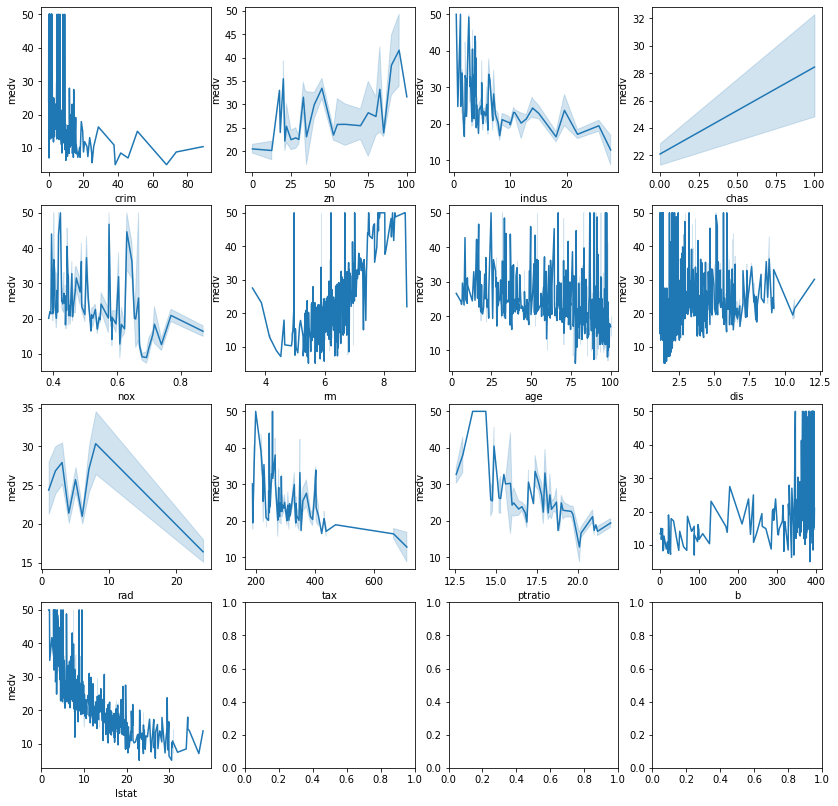

In [8]:
#step 2
boston = sns.load_dataset("boston")
fig,axes=plt.subplots(4,4,figsize=(14, 14))
attribute_list = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']
count = -1
for i in range(4):
    for j in range(4):
        count+=1
        if (i<=2 or j<=0):
            sns.lineplot(x=attribute_list[count],y="medv",data = boston,ax=axes[i][j])

plt.show()

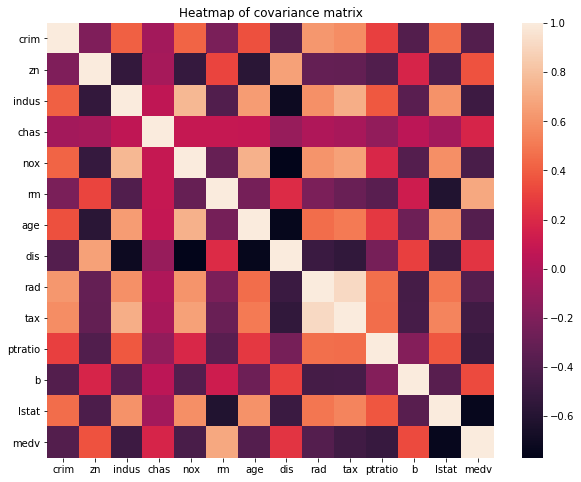

In [9]:
#step 3
fig=plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.title("Heatmap of covariance matrix")
plt.show()

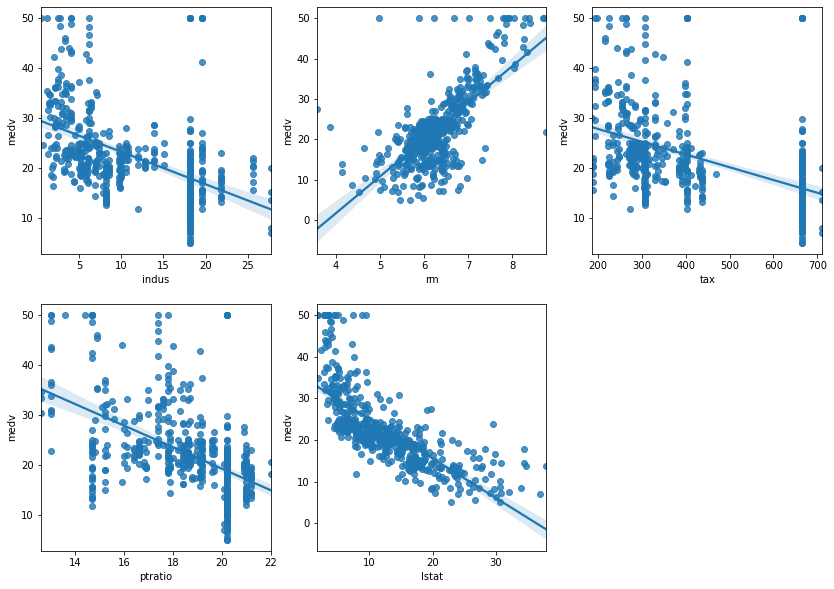

In [10]:
#step 4
from sklearn.preprocessing import MinMaxScaler
attribute_list = ['indus','rm','tax','ptratio','lstat']
subfigure_list = [231,232,233,234,235]

df2 = df[['medv']]
df1 = df[['indus','rm','tax','ptratio','lstat']]
fig=plt.figure(figsize=(14,10))
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_df = scaler.fit_transform(df1)
scaled_medv = scaler.fit_transform(df2)
for i in range(5):
    plt.subplot(subfigure_list[i])
    sns.regplot(x=attribute_list[i],y='medv',data = df,ci=95)

The training error in terms of RMSE is 0.12487463626425599
The testing error in terms of RMSE is 0.13751375521100107


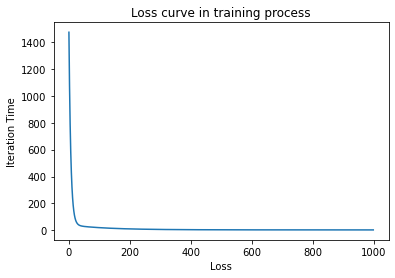

In [14]:
#step 5
import warnings; warnings.filterwarnings('ignore')
X = scaled_df#using the data after scaling
y = scaled_medv

split = int(506*0.8)
train_X = X[0:split]
train_y = y[0:split]
one = np.ones(404)
train_X_update = np.insert(np.array(train_X),0,values=one,axis=1) #insert a column of one 
train_y_update = train_y
test_X = X[split:]
test_y = y[split:]
one = np.ones(102)
test_X_update = np.insert(np.array(test_X),0,values=one,axis=1)
test_y_update = test_y


w = np.ones((6, 1))# randomly choose an initial w
step_size = 0.0001

iteration_steps = 1000

list_loss = []
list_process = []

for i in range(iteration_steps):
    gradient = np.dot(train_X_update.transpose(),(np.dot(train_X_update,w)-train_y_update))
    loss=np.dot((np.dot(train_X_update,w)-train_y_update).transpose(),np.dot(train_X_update,w)-train_y_update)*1/2
    list_process.append(i)
    list_loss.append(float(loss))
    
    w = w - step_size*gradient
    


#following code calculate the RMSE when we set the step size to be 0.0001 and iteration to be 1000
test_predict_y = np.dot(np.array(test_X_update),w)
train_predict_y = np.dot(np.array(train_X_update),w)
train_RMSE = np.sqrt(1/404*np.dot((train_predict_y-train_y_update).transpose(),train_predict_y-train_y_update))
test_RMSE = np.sqrt(1/102*np.dot((test_predict_y-test_y_update).transpose(),test_predict_y-test_y_update))
print("The training error in terms of RMSE is", float(train_RMSE))
print("The testing error in terms of RMSE is", float(test_RMSE))

#following code plot the loss curves in the training process
plt.xlabel("Loss")
plt.ylabel("Iteration Time")
plt.title("Loss curve in training process")
plt.plot(list_process,list_loss)
plt.show()

In [12]:
# step 6
list_iteration = [100,500,1000,1500,2000]#try to change the iteration times
step_size_list = [0.0001,0.001]#try to change the step size
for iteration in list_iteration:
    for step_size in step_size_list:
        w = np.ones((6, 1))
    
        for i in range(iteration):
            gradient = np.dot(train_X_update.transpose(),(np.dot(train_X_update,w)-train_y_update))
            w = w - step_size*gradient
        train_predict_y = np.dot(np.array(train_X_update),w)
        test_predict_y = np.dot(np.array(test_X_update),w)
        train_RMSE = np.sqrt(1/404*np.dot((train_predict_y-train_y_update).transpose(),train_predict_y-train_y_update))
        test_RMSE = np.sqrt(1/102*np.dot((test_predict_y-test_y_update).transpose(),test_predict_y-test_y_update))
        print("When iteration steps equal to {} and step size equal to {}:".format(iteration,step_size))
        print("The training error in terms of RMSE is", float(train_RMSE),"and the testing error in terms of RMSE is", float(test_RMSE))
        

When iteration steps equal to 100 and step size equal to 0.0001:
The training error in terms of RMSE is 0.31432880392173557 and the testing error in terms of RMSE is 0.5219592749349572
When iteration steps equal to 100 and step size equal to 0.001:
The training error in terms of RMSE is 0.12482293847357762 and the testing error in terms of RMSE is 0.137202005710657
When iteration steps equal to 500 and step size equal to 0.0001:
The training error in terms of RMSE is 0.1404208448043981 and the testing error in terms of RMSE is 0.178585127233023
When iteration steps equal to 500 and step size equal to 0.001:
The training error in terms of RMSE is 0.11784300481753227 and the testing error in terms of RMSE is 0.12796033654211392
When iteration steps equal to 1000 and step size equal to 0.0001:
The training error in terms of RMSE is 0.12487463626425599 and the testing error in terms of RMSE is 0.13751375521100107
When iteration steps equal to 1000 and step size equal to 0.001:
The training